In [3]:
# import packages
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats

## Perform Vader sentiment analysis on reviews

In [5]:
# Install and download VADER lexicon
nltk.download('vader_lexicon')

# Load the Yelp review dataset 
df = pd.read_csv('philly_reviews.csv')

# Ensure relevant columns exist 
df = df[['text', 'review_id','business_id']].dropna()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Compute sentiment compound score for a given review."""
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rvt9bx/nltk_data...


### Explore Overall Sentiment

In [7]:
# Stats for overall sentiment score
df['sentiment_score'].describe()

count    107600.000000
mean          0.715064
std           0.490530
min          -0.998800
25%           0.757900
50%           0.932900
75%           0.977000
max           0.999800
Name: sentiment_score, dtype: float64

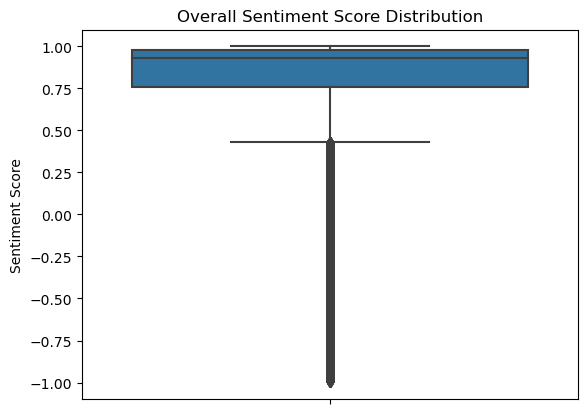

In [14]:
# Visualization
sns.boxplot(y='sentiment_score', data=df)
plt.title('Overall Sentiment Score Distribution')
plt.ylabel('Sentiment Score')
plt.show()

For all reviews (not grouped by restaurant), the mean sentiment score is 0.715064 with a standard deviation of 0.490530. 

### Group by restaurant and calculate mean sentiment score

In [9]:
# Group by business_id and calculate mean sentiment
grouped = df.groupby('business_id')['sentiment_score'].mean().reset_index()

In [11]:
# Stats for grouped sentiment score
grouped['sentiment_score'].describe()

count    816.000000
mean       0.590214
std        0.274408
min       -0.817240
25%        0.467385
50%        0.669708
75%        0.786554
max        0.986900
Name: sentiment_score, dtype: float64

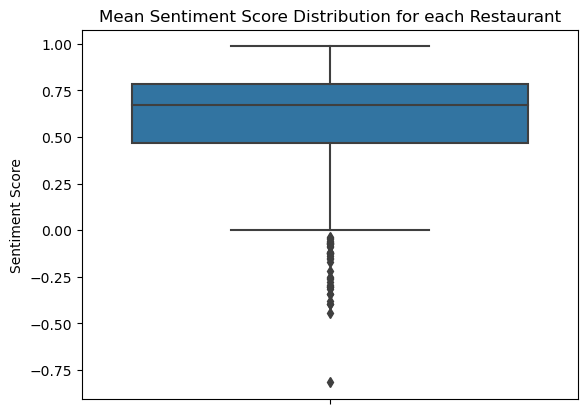

In [13]:
# Visualization
sns.boxplot(y='sentiment_score', data=grouped)
plt.title('Mean Sentiment Score Distribution for each Restaurant')
plt.ylabel('Sentiment Score')
plt.show()

# Perform ANOVA Analysis 

In [16]:
# Import restaurant data 
restaurant_df = pd.read_csv('philly_restaurants.csv',low_memory=False)

In [17]:
restaurant_df

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,price_level
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,3
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1
3,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,1
4,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,2
...,...,...,...,...,...,...,...,...,...,...,...,...
811,33873,cd-EkTwPP0G-bOoZtRTaVA,Tony Lukes Casa De Pasta,26 East Oregon Ave,Philadelphia,PA,19148,39.913628,-75.148815,4.5,7,2
812,33961,Ww8DBKYd-NSRMfDRuddrjA,Sushi Kingdom,427 Franklin Mills Cir,Philadelphia,PA,19154,40.086031,-74.964971,3.5,41,2
813,33986,9AE75wIWF9XiV23NBpHyVA,Corfu Pizza,6730 Old York Rd,Philadelphia,PA,19126,40.056005,-75.140606,3.0,21,1
814,33988,wB1Tin0OW1JRpaKM-E3ZYA,National Mechanics,22 S 3rd St,Philadelphia,PA,19106,39.949544,-75.145987,4.0,875,2


In [2]:
# Perform ANOVA test
price_groups = [df[df['price'] == p]['sentiment_score'].dropna() for p in df['price'].unique()]
anova_result = stats.f_oneway(*price_groups)
print(f"ANOVA p-value: {anova_result.pvalue}")

# Visualization
sns.boxplot(x='price', y='sentiment_score', data=df)
plt.title('Sentiment Scores by Restaurant Price Level')
plt.xlabel('Price Level')
plt.ylabel('Sentiment Score')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


FileNotFoundError: [Errno 2] No such file or directory: 'yelp_data.csv'

In [3]:
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/avesselinov/Project1/main/philly_restaurants.csv'
df_rest = pd.read_csv(url)

In [5]:
df_rest.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,price_level
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,3
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1
3,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,1
4,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,2


In [6]:
df_rest['full_address'] = df_rest[['address', 'city', 'state', 'postal_code']].astype(str).agg(', '.join, axis=1)
df_rest.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,price_level,full_address
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"935 Race St, Philadelphia, PA, 19107"
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,3,"205 Race St, Philadelphia, PA, 19106"
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"1224 South St, Philadelphia, PA, 19147"
3,28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,1,"767 S 9th St, Philadelphia, PA, 19147"
4,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,2,"901 N Delaware Ave, Philadelphia, PA, 19123"


In [7]:
df_rest = df_rest.drop(['address', 'city', 'state', 'postal_code'], axis=1)


In [8]:
df_rest

,Unnamed: 0,business_id,name,latitude,longitude,stars,review_count,price_level,full_address
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,80,1,"935 Race St, Philadelphia, PA, 19107"
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,39.953949,-75.143226,4.0,245,3,"205 Race St, Philadelphia, PA, 19106"
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,39.943223,-75.162568,4.5,205,1,"1224 South St, Philadelphia, PA, 19147"
3,28,QdN72BWoyFypdGJhhI5r7g,Bar One,39.939825,-75.157447,4.0,65,1,"767 S 9th St, Philadelphia, PA, 19147"
4,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,39.962582,-75.135657,3.5,65,2,"901 N Delaware Ave, Philadelphia, PA, 19123"
...,...,...,...,...,...,...,...,...,...
811,33873,cd-EkTwPP0G-bOoZtRTaVA,Tony Lukes Casa De Pasta,39.913628,-75.148815,4.5,7,2,"26 East Oregon Ave, Philadelphia, PA, 19148"
812,33961,Ww8DBKYd-NSRMfDRuddrjA,Sushi Kingdom,40.086031,-74.964971,3.5,41,2,"427 Franklin Mills Cir, Philadelphia, PA, 19154"
813,33986,9AE75wIWF9XiV23NBpHyVA,Corfu Pizza,40.056005,-75.140606,3.0,21,1,"6730 Old York Rd, Philadelphia, PA, 19126"
814,33988,wB1Tin0OW1JRpaKM-E3ZYA,National Mechanics,39.949544,-75.145987,4.0,875,2,"22 S 3rd St, Philadelphia, PA, 19106"


In [9]:
df_rest.rename(columns={'Unnamed: 0': 'index_col'}, inplace=True)

In [10]:
df_rest = df_rest[['business_id','name','full_address','latitude','longitude','stars','review_count','price_level']]

In [11]:
df_rest

,business_id,name,full_address,latitude,longitude,stars,review_count,price_level
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"935 Race St, Philadelphia, PA, 19107",39.955505,-75.155564,4.0,80,1
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,"205 Race St, Philadelphia, PA, 19106",39.953949,-75.143226,4.0,245,3
2,ROeacJQwBeh05Rqg7F6TCg,BAP,"1224 South St, Philadelphia, PA, 19147",39.943223,-75.162568,4.5,205,1
3,QdN72BWoyFypdGJhhI5r7g,Bar One,"767 S 9th St, Philadelphia, PA, 19147",39.939825,-75.157447,4.0,65,1
4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,"901 N Delaware Ave, Philadelphia, PA, 19123",39.962582,-75.135657,3.5,65,2
...,...,...,...,...,...,...,...,...
811,cd-EkTwPP0G-bOoZtRTaVA,Tony Lukes Casa De Pasta,"26 East Oregon Ave, Philadelphia, PA, 19148",39.913628,-75.148815,4.5,7,2
812,Ww8DBKYd-NSRMfDRuddrjA,Sushi Kingdom,"427 Franklin Mills Cir, Philadelphia, PA, 19154",40.086031,-74.964971,3.5,41,2
813,9AE75wIWF9XiV23NBpHyVA,Corfu Pizza,"6730 Old York Rd, Philadelphia, PA, 19126",40.056005,-75.140606,3.0,21,1
814,wB1Tin0OW1JRpaKM-E3ZYA,National Mechanics,"22 S 3rd St, Philadelphia, PA, 19106",39.949544,-75.145987,4.0,875,2


In [12]:
df_rest.to_csv('philly_restaurants_2.csv', index=True)
from google.colab import files
files.download('philly_restaurants_2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

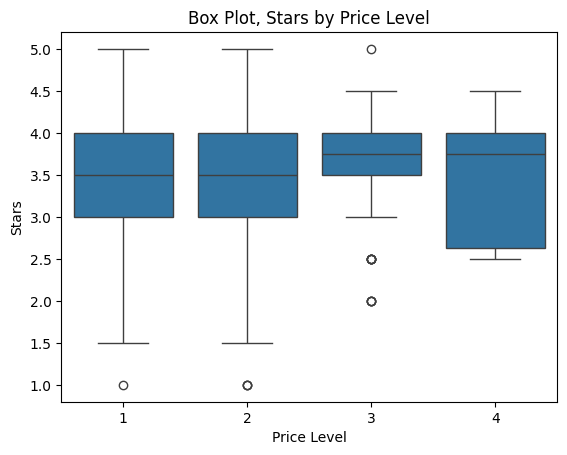

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_rest, x='price_level', y='stars')

# Add labels and title
plt.title('Box Plot, Stars by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Stars')

# Show the plot
plt.show()

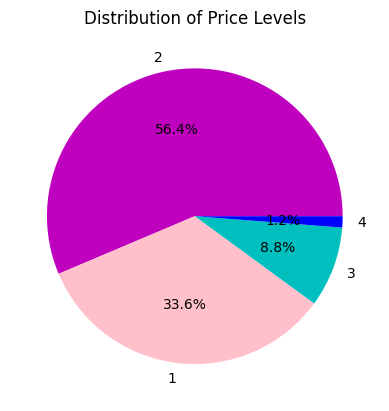

In [30]:
price_counts = df_rest['price_level'].value_counts()
plt.pie(price_counts, labels = price_counts.index, autopct='%1.1f%%', colors = ['m','pink','c','b'])
plt.title('Distribution of Price Levels')
plt.show()
